In [1]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.mllib.util import MLUtils
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql import types
from pyspark.sql.functions import *

myrdd = sc.textFile("MSD.txt")

rdd = myrdd.map(lambda line: line.split(","))
rdd.count()


515345

In [2]:
rdd.take(40)

[['2001',
  '49.94357',
  '21.47114',
  '73.07750',
  '8.74861',
  '-17.40628',
  '-13.09905',
  '-25.01202',
  '-12.23257',
  '7.83089',
  '-2.46783',
  '3.32136',
  '-2.31521',
  '10.20556',
  '611.10913',
  '951.08960',
  '698.11428',
  '408.98485',
  '383.70912',
  '326.51512',
  '238.11327',
  '251.42414',
  '187.17351',
  '100.42652',
  '179.19498',
  '-8.41558',
  '-317.87038',
  '95.86266',
  '48.10259',
  '-95.66303',
  '-18.06215',
  '1.96984',
  '34.42438',
  '11.72670',
  '1.36790',
  '7.79444',
  '-0.36994',
  '-133.67852',
  '-83.26165',
  '-37.29765',
  '73.04667',
  '-37.36684',
  '-3.13853',
  '-24.21531',
  '-13.23066',
  '15.93809',
  '-18.60478',
  '82.15479',
  '240.57980',
  '-10.29407',
  '31.58431',
  '-25.38187',
  '-3.90772',
  '13.29258',
  '41.55060',
  '-7.26272',
  '-21.00863',
  '105.50848',
  '64.29856',
  '26.08481',
  '-44.59110',
  '-8.30657',
  '7.93706',
  '-10.73660',
  '-95.44766',
  '-82.03307',
  '-35.59194',
  '4.69525',
  '70.95626',
  '28.091

In [3]:
#Assign Column Names in the dataframe
df = rdd.map(lambda line: Row(column_0=line[0],
column_1=line[1],
column_2=line[2],
column_3=line[3],
column_4=line[4],
column_5=line[5],
column_6=line[6],
column_7=line[7],
column_8=line[8],
column_9=line[9],
column_10=line[10],
column_11=line[11],
column_12=line[12],
column_13=line[13],
column_14=line[14],
column_15=line[15],
column_16=line[16],
column_17=line[17],
column_18=line[18],
column_19=line[19],
column_20=line[20],
column_21=line[21],
column_22=line[22],
column_23=line[23],
column_24=line[24],
column_25=line[25],
column_26=line[26],
column_27=line[27],
column_28=line[28],
column_29=line[29],
column_30=line[30],
column_31=line[31],
column_32=line[32],
column_33=line[33],
column_34=line[34],
column_35=line[35],
column_36=line[36],
column_37=line[37],
column_38=line[38],
column_39=line[39],
column_40=line[40],
column_41=line[41],
column_42=line[42],
column_43=line[43],
column_44=line[44],
column_45=line[45],
column_46=line[46],
column_47=line[47],
column_48=line[48],
column_49=line[49],
column_50=line[50],
column_51=line[51],
column_52=line[52],
column_53=line[53],
column_54=line[54],
column_55=line[55],
column_56=line[56],
column_57=line[57],
column_58=line[58],
column_59=line[59],
column_60=line[60],
column_61=line[61],
column_62=line[62],
column_63=line[63],
column_64=line[64],
column_65=line[65],
column_66=line[66],
column_67=line[67],
column_68=line[68],
column_69=line[69],
column_70=line[70],
column_71=line[71],
column_72=line[72],
column_73=line[73],
column_74=line[74],
column_75=line[75],
column_76=line[76],
column_77=line[77],
column_78=line[78],
column_79=line[79],
column_80=line[80],
column_81=line[81],
column_82=line[82],
column_83=line[83],
column_84=line[84],
column_85=line[85],
column_86=line[86],
column_87=line[87],
column_88=line[88],
column_89=line[89],
column_90=line[90])).toDF()

#keep 90 attributes for numeric conversion
df_float = df.drop(df.columns[0])
#keep year for integer conversion
df_int = df.select('column_0')

#Convert all features to float
df_1 = df_float.select(*(col(c).cast("float").alias(c) for c in df_float.columns))
#Convert the target variable to integer
df_2 = df_int.select(*(col(c).cast("integer").alias(c) for c in df_int.columns))


features = df_1.rdd.map(lambda line: line[0:])

In [4]:
#Check max and min year
max_value = df_int.agg({"column_0": "max"}).collect()[0][0]
print(max_value)
min_value = df_int.agg({"column_0": "min"}).collect()[0][0]
print(min_value)

2011
1922


In [5]:
#Part 3 of assignment
#Subract lowest year to scale the year column from 0
df_year_scale = df_int.select(df_int['column_0'] - (1922))
df_year = df_year_scale.withColumnRenamed("(column_0 - 1922)", "year")
max_value = df_year.agg({"year": "max"}).collect()[0][0]
print(max_value)
min_value = df_year.agg({"year": "min"}).collect()[0][0]
print(min_value)

89.0
0.0


In [6]:
lab = df_year.rdd.map(lambda line: line[0])

#Part 2 of assignment
#Normalize features between 0 and 1
new_df = lab.zip(features.map(lambda x:Vectors.dense(x))).toDF(schema=['id','features'])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(new_df)
scaledData = scalerModel.transform(new_df)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[49.9435691833496...|[0.80029322515753...|
|[48.7321510314941...|[0.78017706362210...|
|[50.9571418762207...|[0.81712407087869...|
|[48.2475013732910...|[0.77212923075979...|
|[50.9701995849609...|[0.81734090020216...|
|[50.5476684570312...|[0.81032457441064...|
|[50.5754585266113...|[0.81078604143414...|
|[48.2689208984375...|[0.77248491193164...|
|[49.7546806335449...|[0.79715664298378...|
|[45.1780891418457...|[0.72116021385013...|
|[39.1307601928710...|[0.62074150557080...|
|[37.6649818420410...|[0.59640157469287...|
|[26.5195693969726...|[0.41132682013302...|
|[37.6849098205566...|[0.59673248803958...|
|[39.1169509887695...|[0.62051219731753...|
|[35.0512886047363...|[0.55299998352044...|
|[33.6312904357910...|[0.52942025384348...|
|[41.3863906860351...|[0.65819729843244...|
|[37.4503402709960...|[0.5928

In [11]:
#Label the data
from pyspark.mllib.regression import LabeledPoint

#Keep only id and scaledfeatures
transformed_data = scaledData.select("id","scaledFeatures")
#Label id and scaledfeatures
LabeledData = transformed_data.rdd.map(lambda row: LabeledPoint(row[0],[row[1]]))
LabeledData.take(2)

[LabeledPoint(79.0, [0.800293225158,0.384045688063,0.462913427595,0.504117230326,0.0183263139512,0.009168714765,0.0252713881254,0.0213704541928,0.0199878521218,0.0224760310018,0.0258129081403,0.497205220657,0.0242440348744,0.0255181438828,0.0463679906117,0.0140112924429,0.0177423166976,0.577498402028,0.345193597363,0.45670593634,0.565312974473,0.491583909291,0.59962917995,0.464464993288,0.618817802979,0.446819230454,0.370233881669,0.406023165167,0.355862328733,0.406671593785,0.367944667627,0.551502863643,0.615449992786,0.332544938811,0.489803928927,0.564616753802,0.517168236701,0.801435412436,0.364981855299,0.586668104351,0.518611870739,0.624704895939,0.386235556235,0.517537066549,0.370582982313,0.538589232551,0.607256950924,0.414216106337,0.573448309371,0.43945095982,0.745339093249,0.423885515936,0.292904920978,0.270411465425,0.412235325351,0.276962108946,0.29979117391,0.509735460404,0.592735930173,0.417237447562,0.47912360348,0.711346444527,0.525709756289,0.369908847205,0.3588688992,

In [12]:
#Part 4
#Split in training and test set in 80-20 proportion
trainingData, testingData = LabeledData.randomSplit([.8,.2],seed=1234)

In [13]:
#Create a baseline model using Linear Regression with stochastic gradient descent
from pyspark.mllib.regression import LinearRegressionWithSGD
linearModel = LinearRegressionWithSGD.train(trainingData,1000,.2)
linearModel.weights

DenseVector([2.9579, 1.6752, 1.7271, 2.0023, 0.2546, 0.1761, 0.2043, 0.1995, 0.189, 0.2111, 0.1911, 1.8208, 0.2488, 0.1429, 0.3586, 0.1797, 0.1032, 2.3083, 1.3745, 1.7507, 2.1608, 1.9978, 1.8172, 1.848, 2.3941, 1.7322, 1.4189, 1.582, 1.3672, 1.6171, 1.4355, 2.2095, 2.3737, 1.2271, 1.8734, 2.2006, 2.0227, 3.1008, 1.444, 2.2466, 2.0285, 2.4546, 1.4541, 1.9832, 1.5534, 2.0656, 2.406, 1.6278, 2.2428, 1.6688, 2.8952, 1.6801, 1.1163, 1.0376, 1.5866, 1.0018, 1.1584, 1.9895, 2.2795, 1.6106, 1.8557, 2.7867, 2.0513, 1.3947, 1.3896, 1.0278, 2.0613, 2.2142, 2.484, 2.2956, 3.1128, 2.0482, 2.0033, 1.9001, 1.9214, 1.4375, 2.3807, 1.3594, 2.1898, 1.3683, 1.8978, 1.4403, 2.5301, 2.2272, 1.802, 2.3399, 1.3287, 1.9611, 1.8369, 1.3902])

In [14]:
#Check the testing set examples
testingData.take(2)

[LabeledPoint(86.0, [0.620741505571,0.331604357494,0.363890520862,0.44945185237,0.081722708828,0.0306401262679,0.104348956897,0.0995568344578,0.0421834787062,0.16816708677,0.0696193528201,0.435514502233,0.104043451213,0.0354983188728,0.130926367831,0.0787477255813,0.0319697275706,0.589518760804,0.365500170131,0.430849245879,0.546759166154,0.491003813629,0.424455357287,0.462909507326,0.622129643032,0.475129630897,0.343176041046,0.432948513746,0.349532701752,0.470826819092,0.39227170616,0.556259029902,0.598078585389,0.318108074574,0.49513160179,0.64605166605,0.513728025913,0.787747837648,0.352737888469,0.588798051984,0.546773329007,0.61685302817,0.422493983261,0.505499874889,0.40016544282,0.523526068712,0.712794841595,0.416307588426,0.551351377405,0.435114176272,0.742496983512,0.463963217069,0.298409535945,0.241359332526,0.41043298563,0.382233671557,0.252247490614,0.522840561233,0.614828571326,0.471763562602,0.464981222973,0.77619280129,0.517789301781,0.358750998279,0.30672821876,0.27974

In [15]:
linearModel.predict([0.620741505571,0.331604357494,0.363890520862,0.44945185237,0.081722708828,0.0306401262679,0.104348956897,0.0995568344578,0.0421834787062,0.16816708677,0.0696193528201,0.435514502233,0.104043451213,0.0354983188728,0.130926367831,0.0787477255813,0.0319697275706,0.589518760804,0.365500170131,0.430849245879,0.546759166154,0.491003813629,0.424455357287,0.462909507326,0.622129643032,0.475129630897,0.343176041046,0.432948513746,0.349532701752,0.470826819092,0.39227170616,0.556259029902,0.598078585389,0.318108074574,0.49513160179,0.64605166605,0.513728025913,0.787747837648,0.352737888469,0.588798051984,0.546773329007,0.61685302817,0.422493983261,0.505499874889,0.40016544282,0.523526068712,0.712794841595,0.416307588426,0.551351377405,0.435114176272,0.742496983512,0.463963217069,0.298409535945,0.241359332526,0.41043298563,0.382233671557,0.252247490614,0.522840561233,0.614828571326,0.471763562602,0.464981222973,0.77619280129,0.517789301781,0.358750998279,0.30672821876,0.279748654449,0.54426540327,0.561638237172,0.636854079283,0.617654918506,0.799167500558,0.520828628792,0.534038673615,0.527727714097,0.496438343916,0.368846490418,0.633814864328,0.321679001252,0.571849067044,0.368017688708,0.493279412899,0.323389466436,0.664661891158,0.582859982082,0.47043360796,0.625977937299,0.33374924416,0.509540069152,0.486671345123,0.382117115017])

76.709523417864787

In [16]:
#Root mean square error on test set
from pyspark.mllib.evaluation import RegressionMetrics
prediObserRDDout = testingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
metrics = RegressionMetrics(prediObserRDDout)
metrics.rootMeanSquaredError

10.931048543413697

In [17]:
#R2 on the training set
prediObserRDDin = trainingData.map(lambda row: (float(linearModel.predict(row.features[0])),row.label))
metrics = RegressionMetrics(prediObserRDDin)
metrics.r2

0.0033381380195660615

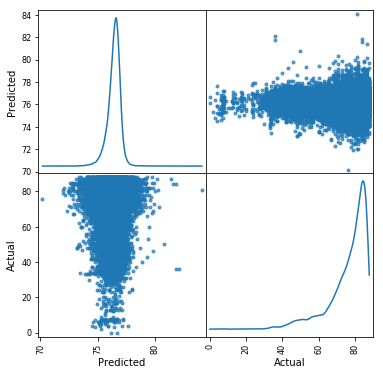

In [20]:
#Part 5
#Scatter Plot on the testing set
%matplotlib inline
plot_df = prediObserRDDout.toDF()
plot_df_rename = plot_df.withColumnRenamed("_1", "Predicted").withColumnRenamed("_2", "Actual")
plot_pd = plot_df_rename.toPandas()

from pandas.tools.plotting import scatter_matrix
stuff = scatter_matrix(plot_pd, alpha=0.7, figsize=(6, 6), diagonal='kde')